In [179]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = pd.read_csv('C:\\Users\\HP\\Documents\\Prediction practice\\data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [182]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [183]:
drop_col = ["date", "street", "country"]
df.drop(drop_col, axis=1, inplace=True)

In [184]:
from datetime import datetime

#Age of House as of Today
df['Age_YearBuilt'] = datetime.now().year - df['yr_built']
#Total Years As of Today after renovation
# df['Age_YearRenov'] = datetime.now().year - df['yr_renovated']

df.drop(["yr_built","yr_renovated"],axis=1,inplace=True)

In [185]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,Age_YearBuilt
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,69
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,WA 98119,103
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,58
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,61
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,48


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  city           4600 non-null   object 
 12  statezip       4600 non-null   object 
 13  Age_YearBuilt  4600 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 503.3+ KB


In [187]:
Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()
Categoricalcol

['city', 'statezip']

In [188]:
df_city=df["city"].unique()

In [189]:
for i in df_city:
    print(i, df["city"].value_counts()[i])

Shoreline 123
Seattle 1573
Kent 185
Bellevue 286
Redmond 235
Maple Valley 96
North Bend 50
Lake Forest Park 36
Sammamish 175
Auburn 176
Des Moines 58
Bothell 33
Federal Way 148
Kirkland 187
Issaquah 187
Woodinville 115
Normandy Park 18
Fall City 11
Renton 293
Carnation 22
Snoqualmie 71
Duvall 42
Burien 74
Covington 43
Inglewood-Finn Hill 1
Kenmore 66
Newcastle 33
Mercer Island 86
Black Diamond 9
Ravensdale 7
Clyde Hill 11
Algona 5
Skykomish 3
Tukwila 29
Vashon 29
Yarrow Point 4
SeaTac 29
Medina 11
Enumclaw 28
Snoqualmie Pass 1
Pacific 6
Beaux Arts Village 1
Preston 2
Milton 2


In [190]:
df_statezip=df["statezip"].unique()

In [191]:
for j in df_statezip:
    print(j, df["statezip"].value_counts()[j])

WA 98133 93
WA 98119 49
WA 98042 100
WA 98008 50
WA 98052 135
WA 98115 130
WA 98038 96
WA 98045 50
WA 98155 88
WA 98105 49
WA 98074 98
WA 98106 66
WA 98007 39
WA 98092 83
WA 98198 56
WA 98006 110
WA 98102 23
WA 98011 32
WA 98125 89
WA 98003 48
WA 98136 57
WA 98033 89
WA 98029 88
WA 98117 132
WA 98034 99
WA 98072 63
WA 98023 95
WA 98107 58
WA 98166 59
WA 98116 65
WA 98024 11
WA 98055 28
WA 98077 52
WA 98027 95
WA 98059 106
WA 98075 83
WA 98014 22
WA 98065 71
WA 98199 68
WA 98053 98
WA 98058 95
WA 98122 66
WA 98103 148
WA 98112 69
WA 98005 29
WA 98118 79
WA 98177 53
WA 98004 74
WA 98019 42
WA 98144 80
WA 98168 67
WA 98001 67
WA 98056 83
WA 98146 54
WA 98028 67
WA 98148 16
WA 98057 14
WA 98040 86
WA 98010 9
WA 98051 7
WA 98031 66
WA 98109 30
WA 98030 41
WA 98126 78
WA 98032 21
WA 98178 49
WA 98288 3
WA 98108 46
WA 98070 29
WA 98188 23
WA 98002 36
WA 98039 11
WA 98022 28
WA 98068 1
WA 98047 6
WA 98050 2
WA 98354 2


In [192]:
# def changeCatVal(val):
#     catValues=["GLQ","ALQ","BLQ","NA","LwQ","Rec"]
#     if val in catValues:
#         return "OTHER"
#     else:
#         return val
# df["BsmtFinType2"] = df["BsmtFinType2"].apply(lambda x:changeCatVal(x))

df["price"]=df["price"].replace(0, df["price"].mean())

In [193]:
df.tail(50)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,Age_YearBuilt
4550,2.147500e+05,3,1.50,1090,8160,1.0,0,0,3,1090,0,Renton,WA 98058,57
4551,2.581250e+05,2,1.00,930,7740,1.0,0,0,3,930,0,Seattle,WA 98125,100
4552,5.519630e+05,4,2.00,2100,4857,2.0,0,0,3,2100,0,Lake Forest Park,WA 98155,59
4553,6.770996e+05,4,2.50,2540,38677,2.0,0,0,3,2540,0,Redmond,WA 98053,37
4554,5.519630e+05,2,1.00,810,8424,1.0,0,0,4,810,0,Federal Way,WA 98023,65
4555,5.519630e+05,2,1.50,1520,8040,1.0,0,0,5,1520,0,Seattle,WA 98125,73
4556,1.675000e+05,1,1.00,690,1950,1.0,0,0,3,690,0,Seattle,WA 98117,96
4557,4.715000e+05,4,3.00,2370,3672,1.5,0,0,5,1650,720,Seattle,WA 98115,108
4558,5.519630e+05,4,4.25,3500,8750,1.0,0,4,5,2140,1360,Seattle,WA 98177,73
4559,4.646000e+05,2,1.00,840,3400,1.0,0,2,4,840,0,Seattle,WA 98119,100


In [194]:
def displayBarValues(chartName,ty=""):
    for p in chartName.patches:
        bar_height = p.get_height() if not pd.isnull(p.get_height()) else 0
        bar_width = p.get_width() if not pd.isnull(p.get_width()) else 0
        bar_x = p.get_x() if not pd.isnull(p.get_x()) else 0
        if(ty=="per"):
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(str)(round(bar_height,1))+"%" or '', color='black', ha="center")
        else:
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(round(bar_height,1)) or '', color='black', ha="center")
       # hideLinesForBar(chartName)
        
def hideLinesForBar(chartname):
    chartname.spines['top'].set_visible(False)
    chartname.spines['right'].set_visible(False)

def displayPieChartValues(chartname):
    chartname.legend(wedges, PerData.funding_round_type,
          title="Funding Types",
          loc="upper left",
          bbox_to_anchor=(0.8, 0, 0.3, 1))
    plt.setp(autotexts, size=8, weight="bold",color='w')

In [195]:
Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()

# # bar chart for percentages of each sub category
# plt.figure(figsize=(20,40))
# for i,col in enumerate(Categoricalcol):
#     plt.subplot(12,4,i+1)
#     chart=(df[col].value_counts(normalize=True)*100).sort_values().plot(kind = 'bar')
#     displayBarValues(chart,"per")
#     hideLinesForBar(chart)
#     plt.xlabel(col)
# plt.show()

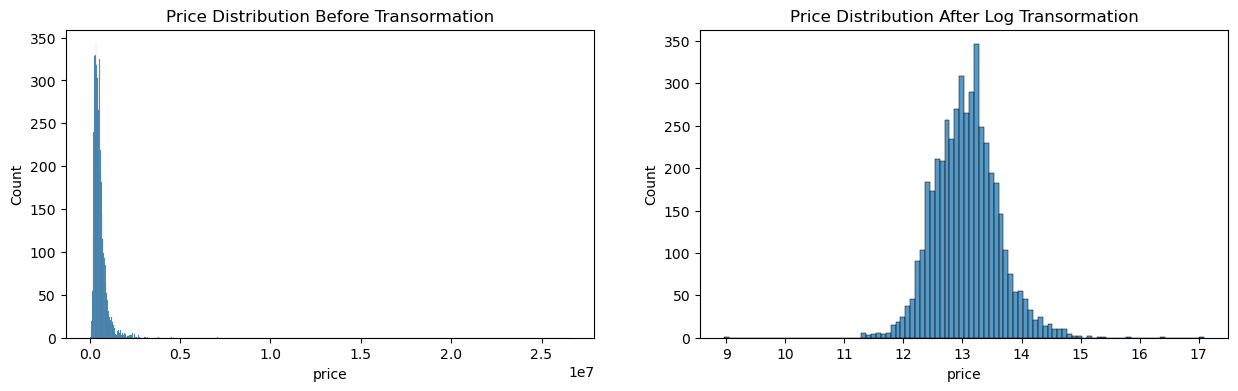

In [196]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(df["price"])
plt.title("Price Distribution Before Transormation")

# Transforming Target Variable to remove right skewness

df["price"]=np.log(df["price"])

plt.subplot(1,2,2)
sns.histplot(df["price"])
plt.title("Price Distribution After Log Transormation")

plt.show()

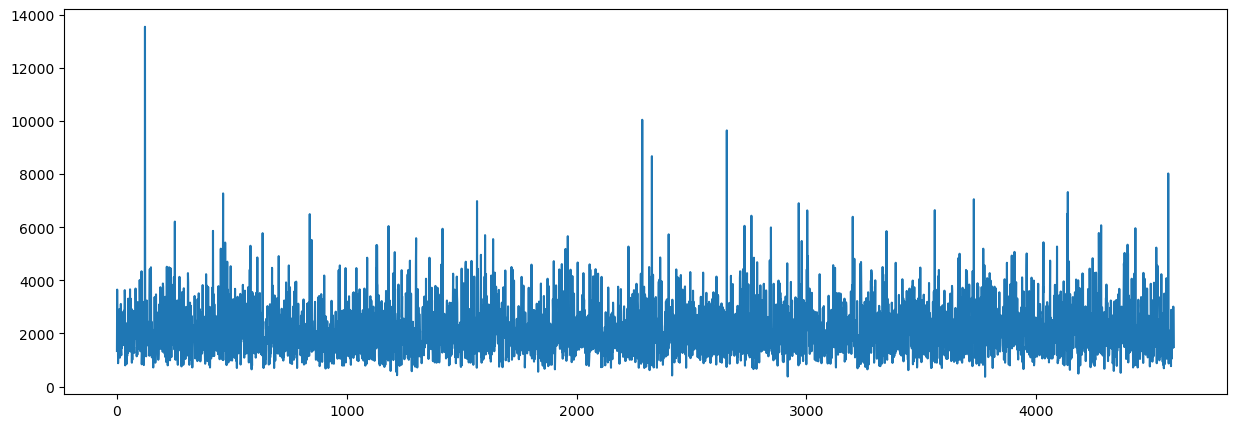

In [197]:
# import numpy as np
# x = np.linspace(0, 10, 100)
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["sqft_living"])
# plt.plot(x, np.cos(x))
plt.show()

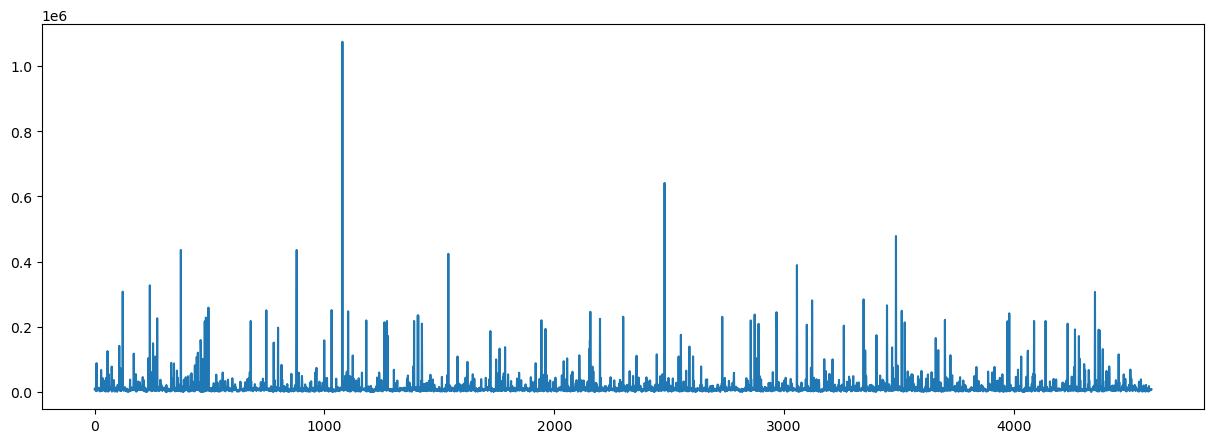

In [198]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["sqft_lot"])
# plt.plot(x, np.cos(x))
plt.show()

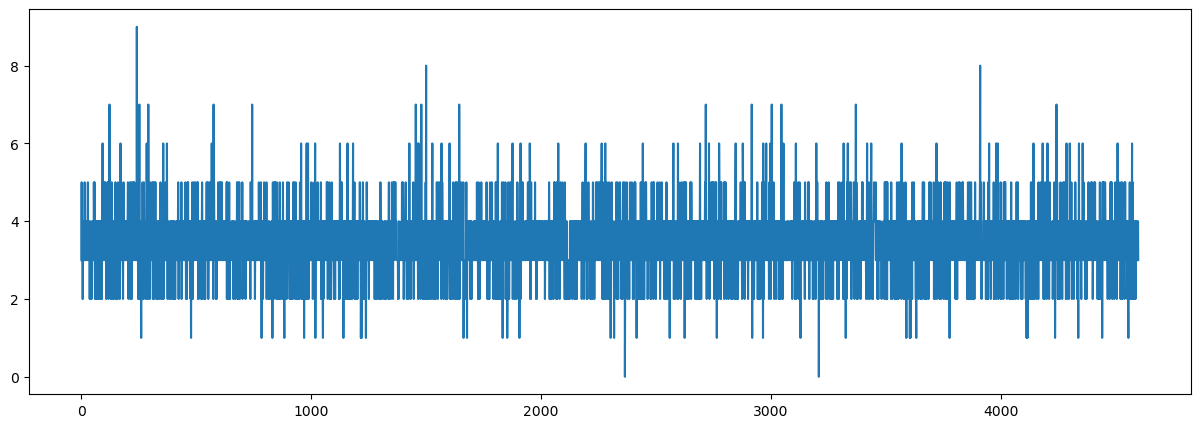

In [199]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["bedrooms"])
# plt.plot(x, np.cos(x))
plt.show()

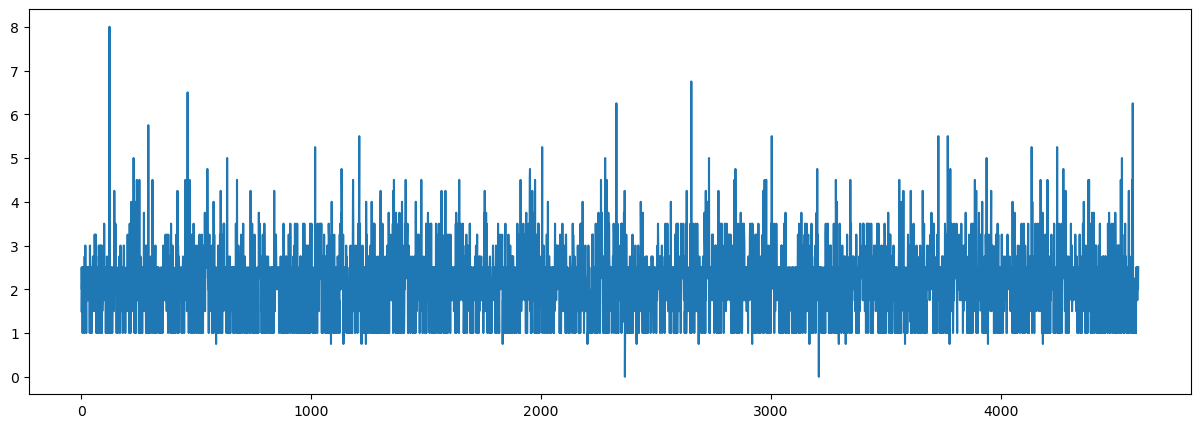

In [200]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["bathrooms"])
# plt.plot(x, np.cos(x))
plt.show()

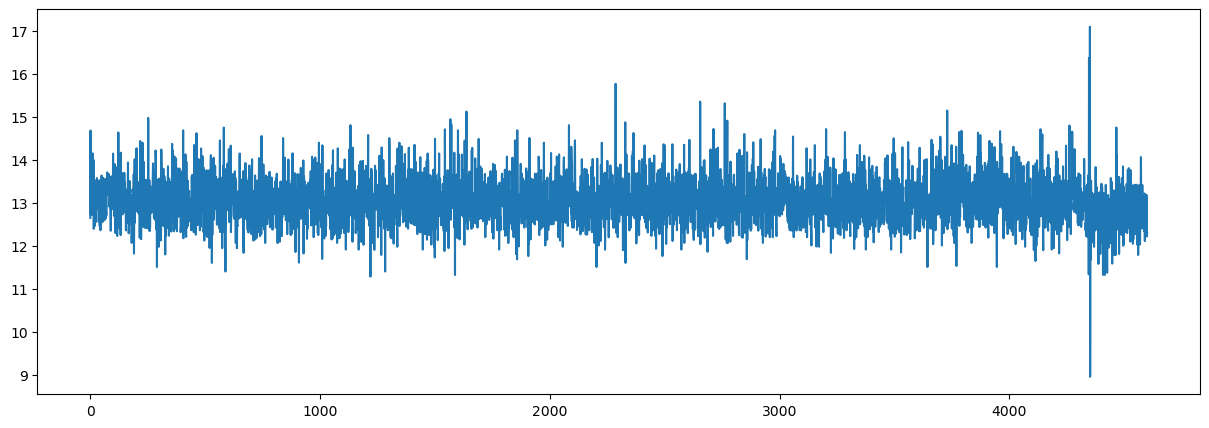

In [201]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df["price"])
# plt.plot(x, np.cos(x))
plt.show()

In [202]:
4348, 4352

(4348, 4352)

In [203]:
df["price"].head()

0    12.653958
1    14.684290
2    12.742566
3    12.948010
4    13.217674
Name: price, dtype: float64

In [204]:
# [df.loc[df['sqft_lot'] == 1074218]]
# df['sqft_lot'][1080]
# df = df.drop(df[df['sqft_lot'] == 1074218].index)
# df.loc[df['points'] == 7]

In [205]:
Categoricalcol=df.select_dtypes(include=["object"]).columns.tolist()
# Categoricalcol
dummies= pd.get_dummies(df[Categoricalcol], drop_first=True)

#Concat two dataframes
df=pd.concat([df,dummies],axis=1)

#drop original variables
df.drop(Categoricalcol,axis=1,inplace=True)

In [206]:
df[["bedrooms","sqft_living","sqft_lot","waterfront","view","condition","sqft_above","sqft_basement","Age_YearBuilt"]]=df[["bedrooms","sqft_living","sqft_lot","waterfront","view","condition","sqft_above","sqft_basement","Age_YearBuilt"]].astype(float)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 131 entries, price to statezip_WA 98354
dtypes: bool(119), float64(12)
memory usage: 965.9 KB


In [208]:
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(df, test_size=0.35)

traindf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
3040,12.611521,2.0,1.00,1060.0,7200.0,1.0,0.0,0.0,4.0,1060.0,...,True,False,False,False,False,False,False,False,False,False
3172,12.936034,3.0,1.75,1070.0,8000.0,1.0,0.0,0.0,3.0,1070.0,...,False,False,False,False,False,False,False,False,False,False
1135,13.228524,3.0,3.00,1960.0,1168.0,2.0,0.0,0.0,3.0,1600.0,...,False,False,False,False,False,False,False,False,False,False
1443,13.431318,3.0,1.00,1700.0,6356.0,1.5,0.0,0.0,3.0,1700.0,...,False,False,False,False,False,False,False,False,False,False
2568,12.983101,3.0,2.50,2300.0,9521.0,2.0,0.0,0.0,3.0,2300.0,...,False,False,False,False,False,False,False,False,False,False


In [209]:
# np.any(np.isnan(traindf))

np.all(np.isfinite(traindf))

# print(np.isnan(traindf.any()))
# print(np.isfinite(traindf.all()))

True

In [210]:
from sklearn.model_selection import train_test_split
traindf, testdf = train_test_split(df, test_size=0.35)

traindf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
3595,13.130728,2.0,1.50,1200.0,1687.0,3.0,0.0,0.0,3.0,1200.0,...,False,False,False,False,False,False,False,False,False,False
1287,13.043320,3.0,1.75,1300.0,2580.0,1.0,0.0,0.0,5.0,820.0,...,False,False,False,False,False,False,False,False,False,False
103,12.700769,4.0,2.50,2370.0,6500.0,2.0,0.0,0.0,3.0,2370.0,...,False,False,False,False,False,False,False,False,False,False
2999,13.567049,3.0,2.25,2140.0,3000.0,2.0,0.0,0.0,3.0,2140.0,...,False,False,False,False,False,False,False,False,False,False
128,12.409013,3.0,1.75,1920.0,9306.0,1.0,0.0,0.0,3.0,1000.0,...,False,False,False,False,False,False,False,False,False,False


In [211]:
numericalcol=df.select_dtypes(include=np.number).columns.tolist()
numCol_df=df[numericalcol]
numericalcol

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'Age_YearBuilt']

In [212]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()

# traindf[numericalcol] = scaler.fit_transform(traindf[numericalcol])

# testdf[numericalcol] = scaler.fit_transform(testdf[numericalcol])

In [213]:
y_train = traindf.pop('price')
x_train = traindf

y_test = testdf.pop('price')
x_test = testdf

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

models = [DecisionTreeRegressor, LinearRegression, Ridge, XGBRegressor, RandomForestRegressor]

for i in models:
    lm = i()
    Model = lm.fit(x_train, y_train)
    prediction = Model.predict(x_train)
    prediction_test = Model.predict(x_test)
    
#     mse = mean_squared_error(prediction_test, y_test)
#     rmse = math.sqrt(mse)
#     print(rmse)
    #print(prediction)
    new_df = pd.DataFrame(prediction,y_train)
    new_test = pd.DataFrame(prediction_test,y_test)
    #print(new_df.head(20))    
    #print(new_test.head(20))    
    mae = r2_score(y_train,prediction)
    print( i, mae)
    mae_test= r2_score(y_test, prediction_test)
    print(i, mae_test)


<class 'sklearn.tree._classes.DecisionTreeRegressor'> 1.0
<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.48277508245191925
<class 'sklearn.linear_model._base.LinearRegression'> 0.7936001130921493
<class 'sklearn.linear_model._base.LinearRegression'> 0.3592494294623072
<class 'sklearn.linear_model._ridge.Ridge'> 0.7914326271793752
<class 'sklearn.linear_model._ridge.Ridge'> 0.7487166534597407
<class 'xgboost.sklearn.XGBRegressor'> 0.9620156251254547
<class 'xgboost.sklearn.XGBRegressor'> 0.7134819727104247
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 0.9604010774264417
<class 'sklearn.ensemble._forest.RandomForestRegressor'> 0.7175623975647758


In [ ]:
np.any(np.isnan(mat))

np.all(np.isfinite(mat))

np.isnan(mat.any())
np.isfinite(mat.all())